# $D_{s1}(2460)^+\to D_s^+\gamma$ production study
## Yields
### Data analysis
#### Fit parameters vs nVeloTracks

Iván Cambón Bouzas

Instituto Galego de Física de Altas Enerxías

Universidade de Santiago de Compostela



In [1]:
import ROOT
from datetime import datetime
import numpy as np
import sys 
import uncertainties as un
import pandas as pd
from particle import Particle
import matplotlib.pyplot as plt
import os
ROOT.EnableImplicitMT()
sys.path.append('/home3/ivan.cambon/Python_Modules/RooPyFit')
sys.path.append('/home3/ivan.cambon/Python_Modules/RooPyShort')
import RooPyFit as rpf
import RooPyShort as rsh

print(datetime.now())

ROOT.gROOT.ProcessLine(".L lhcbStyle.C")
ROOT.lhcbStyle()

%jsroot on

Welcome to JupyROOT 6.28/04
2024-04-09 10:23:57.154017
-------------------------
Set LHCb Style - May 2021
-------------------------


In [2]:
if not os.path.exists("./Graphs"):
    os.makedirs("./Graphs")
else:
    print("Graphs directory already exists")

if not os.path.exists("./root_files"):
    os.makedirs("./root_files")
else:
    print("root_files directory already exists")
    
if not os.path.exists("./Tables"):
    os.makedirs("./Tables")
else:
    print("Tables directory already exists")
    
if not os.path.exists("./Results"):
    os.makedirs("./Results")
else:
    print("Results directory already exists")
    
if not os.path.exists("./Minuit_outputs"):
    os.makedirs("./Minuit_outputs")
else:
    print("Tables directory already exists")

Graphs directory already exists
root_files directory already exists
Tables directory already exists
Results directory already exists
Tables directory already exists


## Fit parameters reading

In [3]:
Years = ['2018']
ninters = 5

if Years != 'Run2':

    Dsst_vals_files = ["Results/Exp_{0}_Dsg_mass_Dsst_ufit_free_vals_str3_{1}eta.csv".format(Year, ninters) for Year in Years]
    Dsst_uncs_files = ["Results/Exp_{0}_Dsg_mass_Dsst_ufit_free_uncs_str3_{1}eta.csv".format(Year, ninters) for Year in Years]

    Ds1_vals_files = ["Results/Exp_{0}_Dsg_mass_Ds1_ufit_free_vals_str3_{1}eta.csv".format(Year, ninters) for Year in Years]
    Ds1_uncs_files = ["Results/Exp_{0}_Dsg_mass_Ds1_ufit_free_uncs_str3_{1}eta.csv".format(Year, ninters) for Year in Years]

In [4]:
dfs_Dsst_vals = [pd.read_csv(file) for file in Dsst_vals_files]
dfs_Dsst_uncs = [pd.read_csv(file) for file in Dsst_uncs_files]

dfs_Ds1_vals = [pd.read_csv(file) for file in Ds1_vals_files]
dfs_Ds1_uncs = [pd.read_csv(file) for file in Ds1_uncs_files]

## Yields vs $\eta(D_s^+\gamma)$

In [5]:
def uratio(a, b, ua, ub):
    ratio = a/b
    uratio = ratio * np.sqrt((ua/a)**2+(ub/b)**2)
    return uratio

ratios  = [df_Ds1["NDs1"]/df_Dsst["NDsst"] for df_Ds1, df_Dsst in zip(dfs_Ds1_vals, dfs_Dsst_vals)]

uratios = [uratio(dfv_Ds1["NDs1"], dfv_Dsst["NDsst"], dfu_Ds1["NDs1"], dfu_Dsst["NDsst"]) 
           for dfv_Ds1, dfv_Dsst, dfu_Ds1, dfu_Dsst in zip(dfs_Ds1_vals, dfs_Dsst_vals, dfs_Ds1_uncs, dfs_Dsst_uncs)]

In [12]:
colors = ["black", "red", "blue"]

plt.figure(1)
plt.text(1.8, 0.74, r"LHCb Preliminar", fontsize = 12)
plt.text(1.8, 0.69, r"$pp$ $\sqrt{s}=13$ $\mathrm{TeV}$", fontsize = 12)
plt.text(1.8, 0.64, r"2018 Data", fontsize = 12)

for i in range(len(Years)):
    plt.errorbar((dfs_Ds1_vals[i])["eta_mean"], ratios[i], uratios[i], 
                 xerr=[(dfs_Ds1_vals[i])["eta_udown"], (dfs_Ds1_vals[i])["eta_uup"]], 
                 fmt='.', color=colors[i], ecolor=colors[i], capsize=3, label=Years[i])
    
plt.xlabel(r"$\eta(D_s^+\gamma)$", fontsize=14)
plt.ylabel(r"$N_S(D_{s1}^+)/N_S(D_s^{*+})$", fontsize=14)
plt.title("Yield ratio vs pseudorapidity")
plt.ylim(0, 0.80)
plt.legend(loc='lower right')
plt.savefig("Graphs/Exp_MagD18_DsgL_mass_Ds1_Dsst_yield_ratio_{0}eta.pdf".format(ninters), dpi=300, bbox_inches='tight')

plt.figure(2)

for i in range(len(Years)):
    plt.errorbar((dfs_Ds1_vals[i])["eta_mean"], uratios[i]/ratios[i], yerr=0,
                 xerr=[(dfs_Ds1_vals[i])["eta_udown"], (dfs_Ds1_vals[i])["eta_uup"]], 
                 fmt='.', color=colors[i], ecolor=colors[i], capsize=3, label=Years[i])

plt.xlabel(r"$\eta(D_s^+\gamma)$", fontsize=14)
plt.ylabel(r"Relative uncertainty (%)", fontsize=14)
plt.title("Yield ratio vs pseudorapidity uncertainty")
plt.savefig("Graphs/Exp_MagD18_DsgL_mass_Ds1_Dsst_yield_ratio_ru_{0}eta.pdf".format(ninters), dpi=300, bbox_inches='tight')


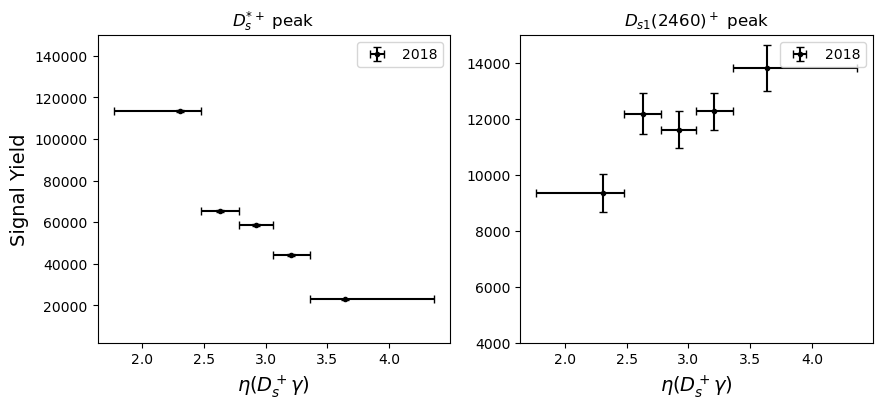

In [7]:
plt.figure(1, figsize=(10, 4))

plt.subplot(121)
for i in range(len(Years)):
    plt.errorbar((dfs_Dsst_vals[i])["eta_mean"], (dfs_Dsst_vals[i])["NDsst"], (dfs_Dsst_uncs[i])["NDsst"], 
                 xerr=[(dfs_Dsst_vals[i])["eta_udown"], (dfs_Dsst_vals[i])["eta_uup"]], 
                 fmt='.', color=colors[i], ecolor=colors[i], capsize=3, label=Years[i])
plt.xlabel(r"$\eta(D_s^+\gamma)$", fontsize=14)
plt.title(r"$D_{s}^{*+}$ peak")
plt.ylabel(r"Signal Yield", fontsize=14)
plt.legend()
plt.ylim(2000, 150000)

plt.subplot(122)
for i in range(len(Years)):
    plt.errorbar((dfs_Ds1_vals[i])["eta_mean"], (dfs_Ds1_vals[i])["NDs1"], (dfs_Ds1_uncs[i])["NDs1"], 
                 xerr=[(dfs_Ds1_vals[i])["eta_udown"], (dfs_Ds1_vals[i])["eta_uup"]], 
                 fmt='.', color=colors[i], ecolor=colors[i], capsize=3, label=Years[i])
plt.xlabel(r"$\eta(D_s^+\gamma)$", fontsize=14)
plt.title(r"$D_{s1}(2460)^+$ peak")
plt.legend()
plt.ylim(4000, 15000)
plt.savefig("Graphs/Exp_MagD18_DsgL_mass_yields_{0}eta.pdf".format(ninters), dpi=300, bbox_inches='tight')

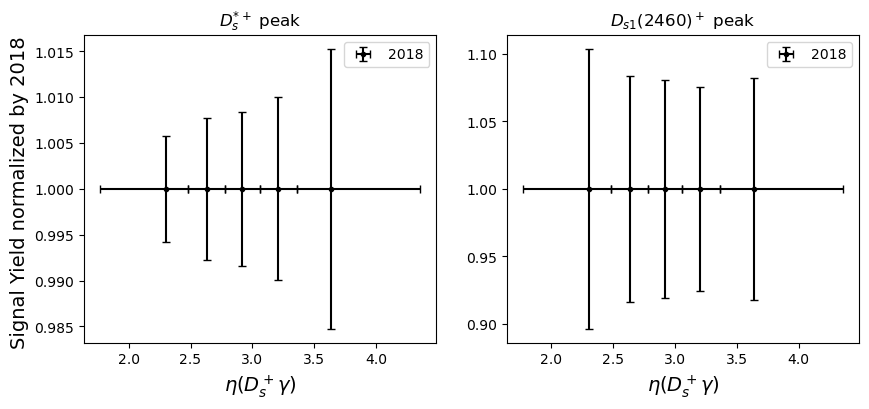

In [8]:
plt.figure(1, figsize=(10, 4))

plt.subplot(121)
for i in range(len(Years)):
    plt.errorbar((dfs_Dsst_vals[i])["eta_mean"], (dfs_Dsst_vals[i])["NDsst"]/(dfs_Dsst_vals[0])["NDsst"], 
                 uratio((dfs_Dsst_vals[i])["NDsst"], (dfs_Dsst_vals[0])["NDsst"], (dfs_Dsst_uncs[i])["NDsst"], (dfs_Dsst_uncs[0])["NDsst"]), 
                 xerr=[(dfs_Dsst_vals[i])["eta_udown"], (dfs_Dsst_vals[i])["eta_uup"]], 
                 fmt='.', color=colors[i], ecolor=colors[i], capsize=3, label=Years[i])
plt.xlabel(r"$\eta(D_s^+\gamma)$", fontsize=14)
plt.title(r"$D_{s}^{*+}$ peak")
plt.ylabel(r"Signal Yield normalized by 2018 ", fontsize=14)
plt.legend()

plt.subplot(122)
for i in range(len(Years)):
    plt.errorbar((dfs_Ds1_vals[i])["eta_mean"], (dfs_Ds1_vals[i])["NDs1"]/(dfs_Ds1_vals[0])["NDs1"], 
                 uratio((dfs_Ds1_vals[i])["NDs1"], (dfs_Ds1_vals[0])["NDs1"], (dfs_Ds1_uncs[i])["NDs1"], (dfs_Ds1_uncs[0])["NDs1"]), 
                 xerr=[(dfs_Ds1_vals[i])["eta_udown"], (dfs_Ds1_vals[i])["eta_uup"]], 
                 fmt='.', color=colors[i], ecolor=colors[i], capsize=3, label=Years[i])
plt.xlabel(r"$\eta(D_s^+\gamma)$", fontsize=14)
plt.title(r"$D_{s1}(2460)^+$ peak")
plt.legend()
plt.savefig("Graphs/Exp_MagD18_DsgL_mass_yields_2_{0}eta.pdf".format(ninters), dpi=300, bbox_inches='tight')

### Parameters vs $\eta(D_s^+\gamma)$

In [9]:
plt.figure(1, figsize=(10, 4))

plt.subplot(121)
for i in range(len(Years)):
    plt.errorbar((dfs_Dsst_vals[i])["eta_mean"], (dfs_Dsst_vals[i])["sigma_Dsst"], (dfs_Dsst_uncs[i])["sigma_Dsst"], 
                 xerr=[(dfs_Dsst_vals[i])["eta_udown"], (dfs_Dsst_vals[i])["eta_uup"]], 
                 fmt='.', color=colors[i], ecolor=colors[i], capsize=3, label=Years[i])
plt.xlabel(r"$\eta(D_s^+\gamma)$", fontsize=14)
plt.title(r"$D_{s}^{*+}$ peak")
plt.ylabel(r"Width [MeV/$c^2$]", fontsize=14)
plt.legend()

plt.subplot(122)
for i in range(len(Years)):
    plt.errorbar((dfs_Ds1_vals[i])["eta_mean"], (dfs_Ds1_vals[i])["sigma_Ds1"], (dfs_Ds1_uncs[i])["sigma_Ds1"], 
                 xerr=[(dfs_Ds1_vals[i])["eta_udown"], (dfs_Ds1_vals[i])["eta_uup"]], 
                 fmt='.', color=colors[i], ecolor=colors[i], capsize=3, label=Years[i])
plt.xlabel(r"$\eta(D_s^+\gamma)$", fontsize=14)
plt.title(r"$D_{s1}(2460)^+$ peak")
plt.legend()
plt.savefig("Graphs/Exp_MagD18_DsgL_mass_width_{0}eta.pdf".format(ninters), dpi=300, bbox_inches='tight')

In [10]:
plt.figure(1, figsize=(12, 8))
plt.subplot(1, 3, 1)
for i in range(len(Years)):
    plt.errorbar((dfs_Dsst_vals[i])["eta_mean"], (dfs_Dsst_vals[i])["aDsst"], (dfs_Dsst_uncs[i])["aDsst"], 
                 xerr=[(dfs_Dsst_vals[i])["eta_udown"], (dfs_Dsst_vals[i])["eta_uup"]], 
                 fmt='.', color=colors[i], ecolor=colors[i], capsize=3, label=Years[i])
plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$", fontsize=14)
plt.title(r"$D_{s}^{*+}$ peak")
plt.ylabel(r"$\alpha$", fontsize=14)
plt.legend()

plt.subplot(1, 3, 2)
for i in range(len(Years)):
    plt.errorbar((dfs_Dsst_vals[i])["eta_mean"], (dfs_Dsst_vals[i])["bDsst"], (dfs_Dsst_uncs[i])["bDsst"], 
                 xerr=[(dfs_Dsst_vals[i])["eta_udown"], (dfs_Dsst_vals[i])["eta_uup"]], 
                 fmt='.', color=colors[i], ecolor=colors[i], capsize=3, label=Years[i])
plt.xlabel(r"$\eta(D_s^+\gamma)$", fontsize=14)
plt.title(r"$D_{s}^{*+}$ peak")
plt.ylabel(r"$\alpha$", fontsize=14)
plt.legend()

plt.subplot(1, 3, 3)
for i in range(len(Years)):
    plt.errorbar((dfs_Dsst_vals[i])["eta_mean"], (dfs_Dsst_vals[i])["cDsst"], (dfs_Dsst_uncs[i])["cDsst"], 
                 xerr=[(dfs_Dsst_vals[i])["eta_udown"], (dfs_Dsst_vals[i])["eta_uup"]], 
                 fmt='.', color=colors[i], ecolor=colors[i], capsize=3, label=Years[i])
plt.xlabel(r"$\eta(D_s^+\gamma)$", fontsize=14)
plt.title(r"$D_{s}^{*+}$ peak")
plt.ylabel(r"$\alpha$", fontsize=14)
plt.legend()